In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import zipfile
from zipfile import ZipFile
import joblib
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from random import randint


## 1. Preliminary Data Analysis and Cleaning

In [94]:
# Loading the dataset
path = r"wine+quality (1).zip"

# Function to unzip
def check_data(path):
  print(f"unzipping data....")
  with ZipFile(path, "r") as f:
    f.printdir()
    

# function to load white wine
def load_data(path):
  with ZipFile(path, "r") as zip_data:
    with zip_data.open("winequality-white.csv") as f:
      data = pd.read_csv(f, sep=";")
      return data


In [95]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,Good


In [96]:
check_data(path)

unzipping data....
File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [97]:
data = load_data(path)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 2. Display the first 6 rows and dataset shape

In [98]:
def data_overview(data, target = 'target'):
  # Displaying the first 6 rows
  display(data.head(6))
  # Checking the shape of the dataset
  print(f"The shape of the dataset is \n{data.shape}")
  # Checking for missing values
  print(f"The missing values are {data.isna().sum()}")
  print(f"The duplicates values are {data.duplicated().sum()}")
  print(f"The datatypes {data.dtypes}")
  print(f"{data.info}")

    # if target in data.columns:
    #   print("\nTarget Distributions")
    #   print(data{target}.value_counts().sort_index())

In [99]:
data_overview(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


The shape of the dataset is 
(4898, 12)
The missing values are fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
The duplicates values are 937
The datatypes fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36       

In [100]:
# Check for duplicates
def check_duplicates(data):
    duplicate = data.duplicated().sum()
    if duplicate > 0:
        print(f"There are {duplicate} duplicate rows in the dataset")
    else:
        print("No duplicate rows in the dataset")

check_duplicates(data)

There are 937 duplicate rows in the dataset


In [101]:
# Lets handle the duplicate
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)
check_duplicates(data)

No duplicate rows in the dataset


Provide markdown summary of all claning actions taken

### **2. Exploratory Data Analysis (EDA) and Scaling**

In [102]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3961.0,6.839346,0.866860,3.80000,6.30000,6.8000,7.30000,14.20000
volatile acidity,3961.0,0.280538,0.103437,0.08000,0.21000,0.2600,0.33000,1.10000
citric acid,3961.0,0.334332,0.122446,0.00000,0.27000,0.3200,0.39000,1.66000
residual sugar,3961.0,5.914819,4.861646,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,3961.0,0.045905,0.023103,0.00900,0.03500,0.0420,0.05000,0.34600
free sulfur dioxide,3961.0,34.889169,17.210021,2.00000,23.00000,33.0000,45.00000,289.00000
total sulfur dioxide,3961.0,137.193512,43.129065,9.00000,106.00000,133.0000,166.00000,440.00000
density,3961.0,0.993790,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3961.0,3.195458,0.151546,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,3961.0,0.490351,0.113523,0.22000,0.41000,0.4800,0.55000,1.08000


In [103]:
# Since all columns are numerical features, selecting histogram because it is easy to identify skewness
def univariate_analysis(data):
    for column in data.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

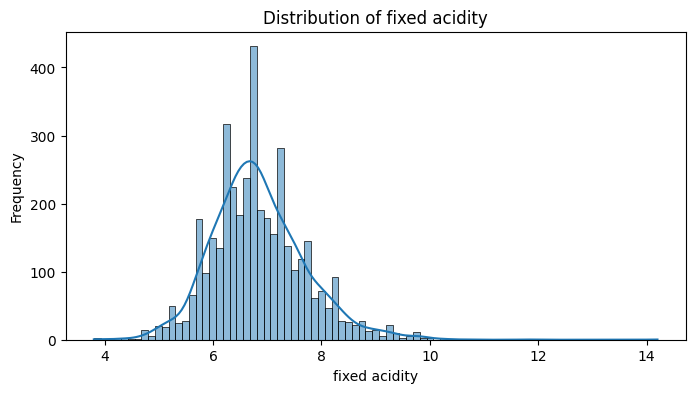

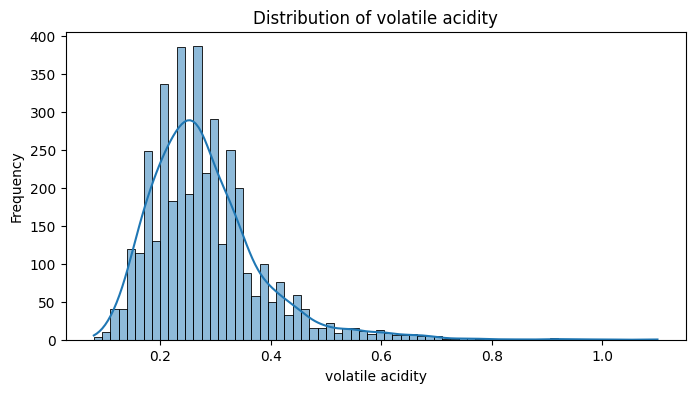

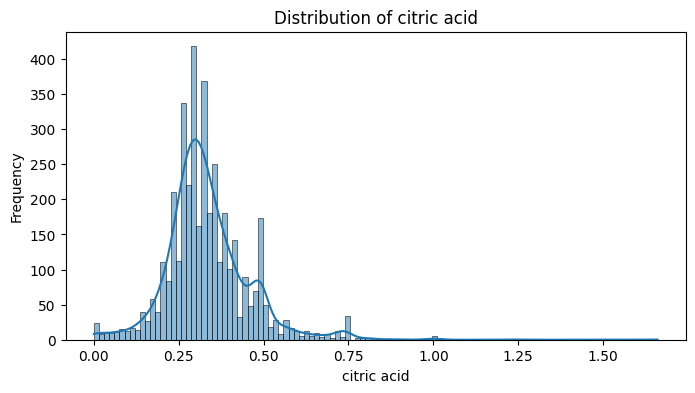

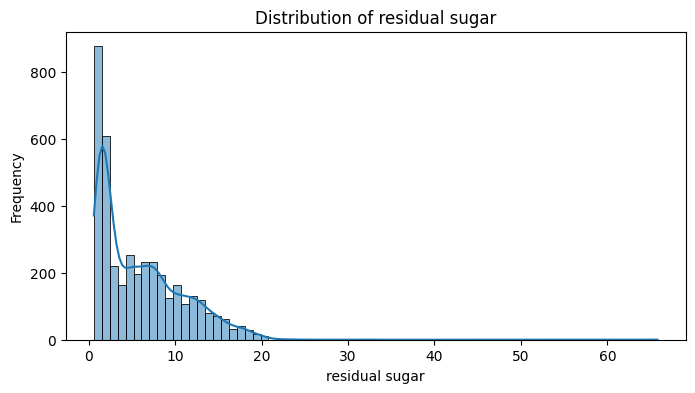

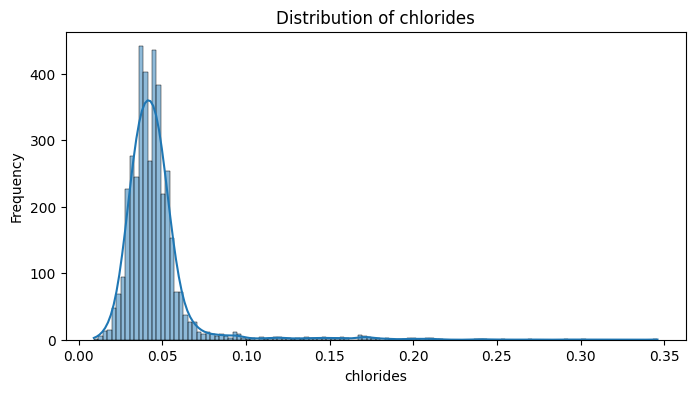

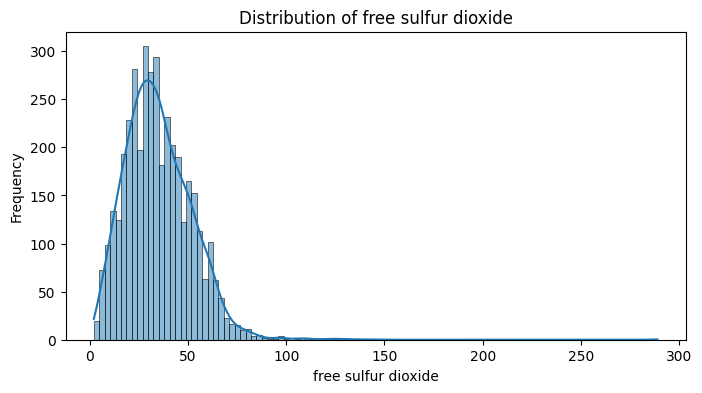

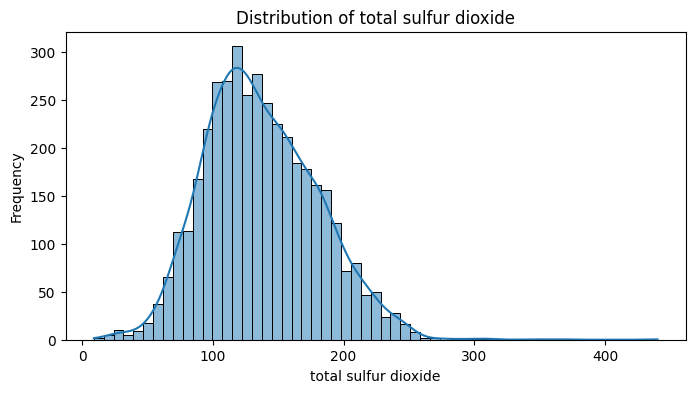

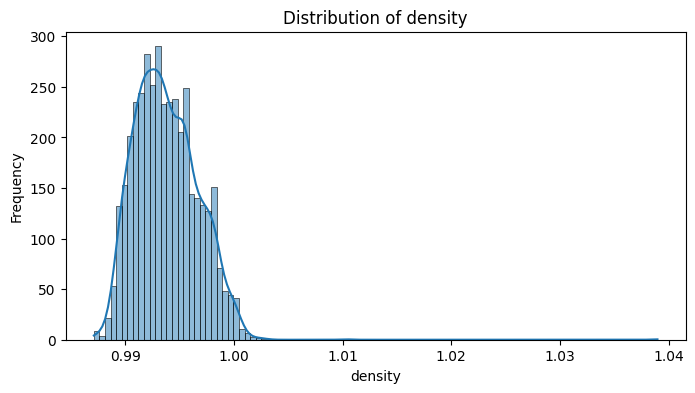

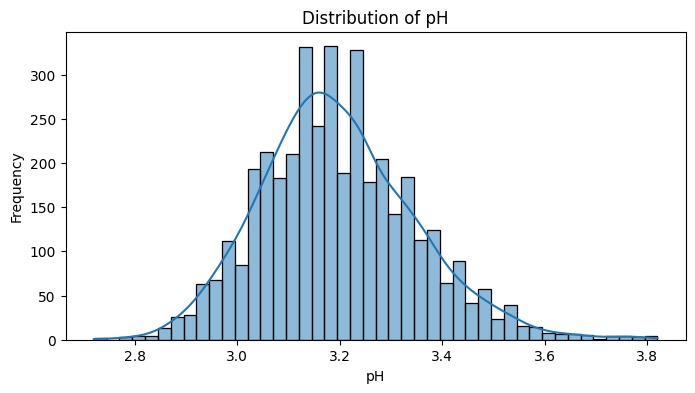

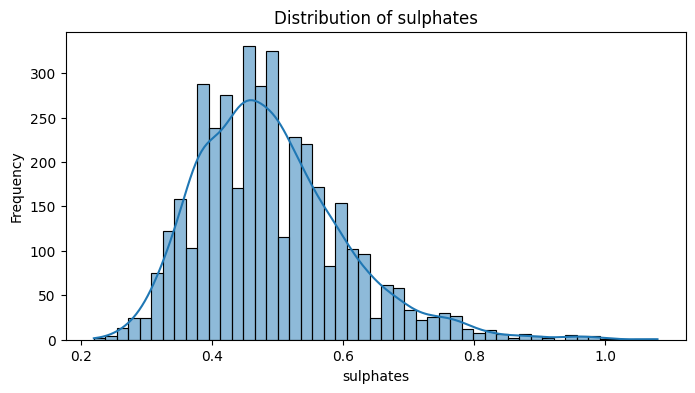

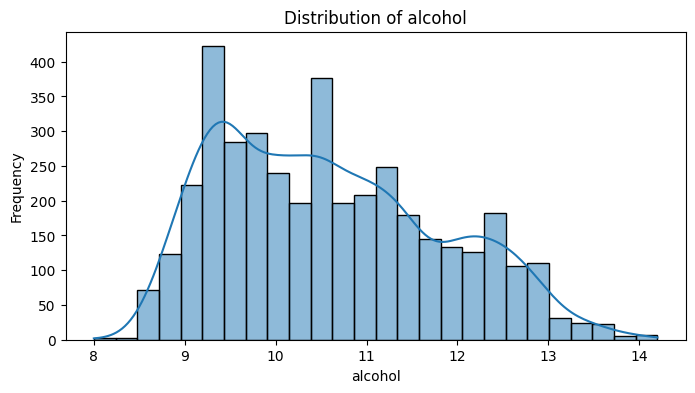

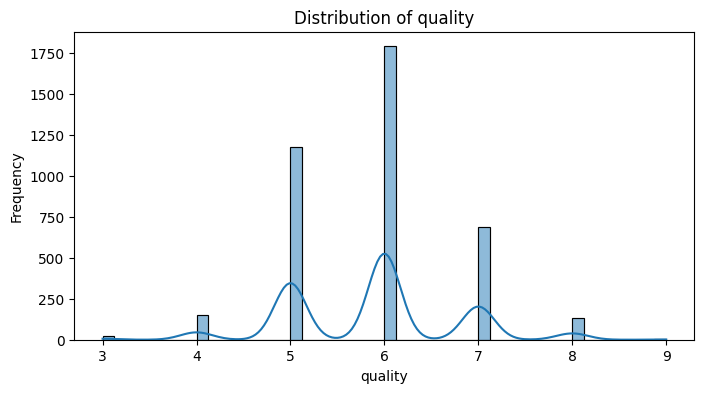

In [104]:
univariate_analysis(data)

2. Examine the correlation of each features with target variable (quality)

In [105]:
# to examine correlation
def corr_with_target(data, target='quality'):
    correlations = data.corr()[target].sort_values(ascending=False)
    print(f"Correlation of each feature with the target variable '{target}':\n{correlations}")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlations.index, y=correlations.values)
    plt.title(f'Correlation of Features with {target}')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45)
    plt.show()


Correlation of each feature with the target variable 'quality':
quality                 1.000000
alcohol                 0.462869
pH                      0.123829
sulphates               0.053200
free sulfur dioxide     0.010507
citric acid             0.007065
residual sugar         -0.117339
fixed acidity          -0.124636
total sulfur dioxide   -0.183356
volatile acidity       -0.190678
chlorides              -0.217739
density                -0.337805
Name: quality, dtype: float64


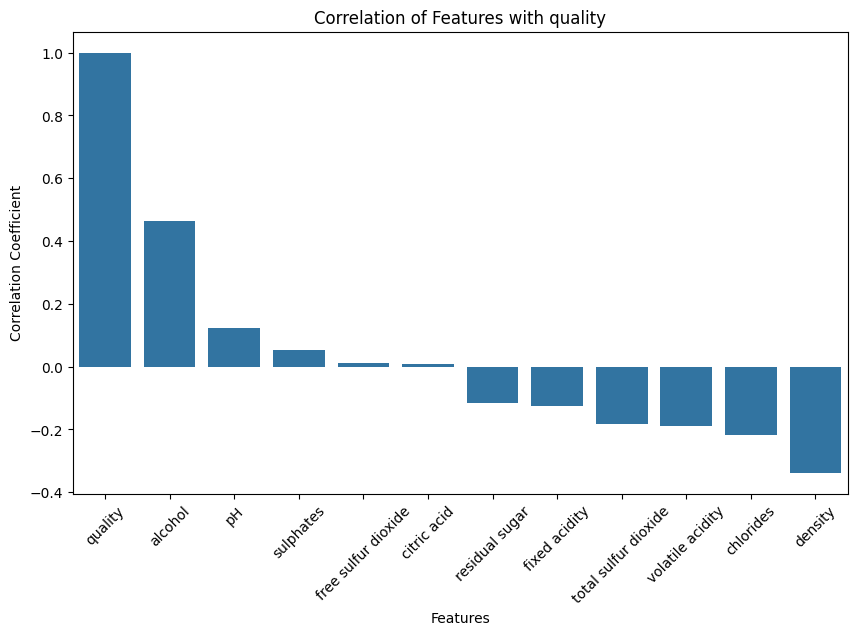

In [106]:
corr_with_target(data)

3. Mapping Quality column into categorical Classes

In [107]:
data.replace({"quality":{9:"Best", 8:"Best", 7:"Good", 6:"Good", 5:"Average", 4:"Bad", 3:"Bad", 2:"poor"}}, inplace=True)

In [108]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

#### 5. Split the datasets into features x and target y

In [109]:
X = data.drop(columns= "quality")
y = data["quality"]

#### 6. Apply appropriate scaling (StandardScaler or Minmax scaler) to all numerical features

In [ ]:
# Applying MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(X)

### 3. Build a Base Classification Model

#### 1. Split the data into training and testing set

In [113]:
# Splitting the data into train Test split
X_train, X_test, y_train, y_test = train_test_split(
  x_scaled, y, 
  test_size=0.2, 
  random_state=234, 
  shuffle=True, 
  stratify=y
)

#### 2 and 3. Train a simple model such as Logistic regression or Decision Tree and. Evaluate the model using Accuracy, Precision, Recall, F1 score and a confusion Matrix

Training Decision Tree
Decision Tree Accuracy: 0.592686002522068


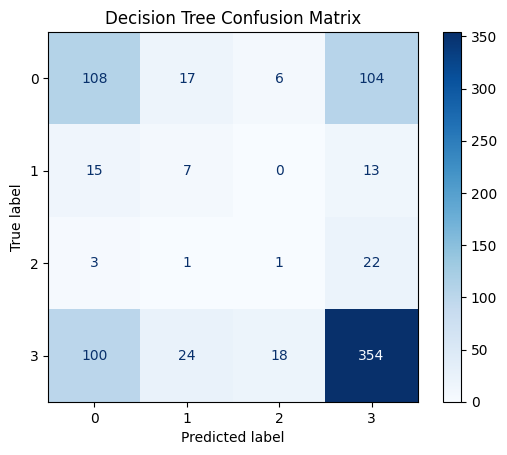


Model performance summary
Decision Tree: 0.5927


In [114]:
model1 = {
  "Decision Tree": DecisionTreeClassifier()

}

# initialize a dictionary to store model
results = {}
for model_name, model in model1.items():

  print(f"Training {model_name}")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  results[model_name] = accuracy
  print(f"{model_name} Accuracy: {accuracy}")

  # Lets include confusion matrix

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)

  # Plot with model name as title
  disp.plot(cmap="Blues")
  plt.title(f"{model_name} Confusion Matrix")
  plt.show()


print("\nModel performance summary")
for model_name, acc in results.items():
  print(f"{model_name}: {acc:.4f}")

#### 4. Provide a short interpretation of what the metrics mean in relation to the models predictive ability

The decision tree model achieved an accuracy of about 59.27%, meaning it correctly classified a little more than half of the test samples. From the confusion matrix, it’s clear that the model performs well for some classes but struggles with others. For example, the majority of the samples in class 3 were correctly predicted, as shown by the large value along the diagonal (354), but there’s confusion between classes 0 and 3, where a number of samples from class 0 were incorrectly classified as class 3 and vice versa.
This shows that while the model can recognize certain patterns well, its overall predictive ability is limited—possibly due to overlapping features between classes or insufficient feature discrimination. In simple terms, the decision tree has learned some useful distinctions but is not generalizing well enough to make consistently accurate predictions across all categories.

### 4. BUildand compare multiple models

#### 1. Train at least 3 different models and cokmpare different classification models


Training SVM
SVM Accuracy: 0.6885245901639344


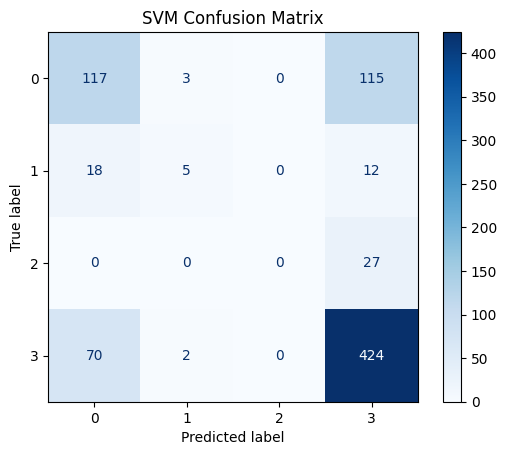

Training K Nearest Neighbors
K Nearest Neighbors Accuracy: 0.6658259773013872


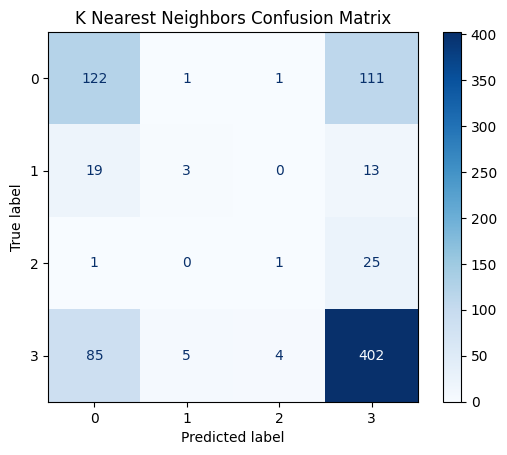

Training Naive Bayes
Naive Bayes Accuracy: 0.639344262295082


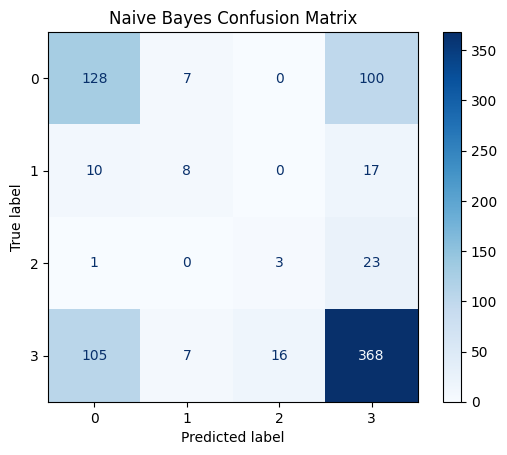


Model performance summary
SVM: 0.6885
K Nearest Neighbors: 0.6658
Naive Bayes: 0.6393


In [126]:
models = {
  "SVM": RandomForestClassifier(),
  "K Nearest Neighbors": KNeighborsClassifier(),
  "Naive Bayes": GaussianNB()
}

# initialize a dictionary to store model
results = {}
for model_name, model in models.items():

  print(f"Training {model_name}")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  results[model_name] = accuracy
  print(f"{model_name} Accuracy: {accuracy}")

  # Lets include confusion matrix

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)

  # Plot with model name as title
  disp.plot(cmap="Blues")
  plt.title(f"{model_name} Confusion Matrix")
  plt.show()

print("\nModel performance summary")
for model_name, acc in results.items():
  print(f"{model_name}: {acc:.4f}")

#### 3. Identify and justify which model performs best based on a balance of these metrics

K-Nearest Neighbors (KNN)
The KNN model achieved an accuracy of about 66.6%, which shows a moderate level of predictive performance. From the confusion matrix, it’s clear that the model correctly classified most samples from class 3, but it struggled to distinguish between classes 0 and 3, leading to some overlap. Overall, the model performs decently but still leaves room for improvement in identifying less frequent classes.


Naive Bayes
With an accuracy of around 63.9%, the Naive Bayes model shows fair predictive ability but slightly lower than KNN. It does well with class 3 predictions but tends to misclassify samples from other classes, particularly class 0. This suggests that the model’s assumption of feature independence may not fully hold for this dataset, causing reduced accuracy across multiple categories.


Support Vector Machine (SVM)
The SVM model recorded the highest accuracy at 69.2%, indicating stronger predictive capability than the other models. It performs best in recognizing class 3 and maintains relatively balanced predictions across the rest, though some confusion between classes 0 and 3 persists. 


Overall, SVM shows the most reliable generalization among the tested models.

### 5. Optimize model using Randomized search

#### 1. Use RandomizedSearchCv to perform hyperameter optimization on the best model

In [122]:
# Lets get parameters for SVM (Best Classifier)

svm = RandomForestClassifier()
svm.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [127]:
param_dist = {
  "n_estimators":randint(50, 200),
  "max_depth": randint(10, 20),
  "min_samples_split": (2, 10),
  "min_samples_leaf": (1, 4)
}

# Tuning SVM- HYPERPARAMETERS
param_grid = {
  "n_estimators": [50, 100, 200],
  "max_depth": [10, 20, 30],
  "min_samples_split": [2, 5, 10],
  "min_samples_leaf": [1, 2, 4]
}

# Define svm
random_search = RandomizedSearchCV(
  RandomForestClassifier(random_state=234), 
  param_distributions = param_grid,
  cv=5,
  # # verbose=1,
  n_jobs=-1
)


#### 2. Retraining the model using the optimal parameters found

3. 

In [128]:
random_search.fit(X_train, y_train)

print(f"Best parameters for SVM: {random_search.best_estimator_}")

Best_Model = random_search.best_estimator_
cv_scores = cross_val_score(Best_Model, x_scaled, y, cv=5)

print(f"cross-validation for SVM: {cv_scores}")
print(f"mean cross-validation score: {cv_scores.mean()}")

Best parameters for RandomForest: RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=234)
cross-validation for SVM: [0.6519546  0.6729798  0.70707071 0.69318182 0.70707071]
mean cross-validation score: 0.6864515266154612


#### Reevaluate the model using same classification metrics

In [129]:
y_pred = Best_Model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

     Average       0.58      0.51      0.55       235
         Bad       0.57      0.11      0.19        35
        Best       1.00      0.00      0.00        27
        Good       0.74      0.86      0.79       496

    accuracy                           0.69       793
   macro avg       0.72      0.37      0.38       793
weighted avg       0.69      0.69      0.67       793



#### Provide a short commentary on whether optimization improved model performance and why

After the hyperparameter tuning, the SVM model maintained an overall accuracy of  **69%**, which is roughly the same as before optimization. But, looking deeper into the precision, recall, and F1-scores, the results show that while the model performs quite well for the *Good* class (with high recall and F1-score), its performance on the *Bad* and *Best* classes remains poor. This suggests that the optimization didn’t significantly improve the model’s ability to generalize across all categories. This reinforced what the model was already good at.

The tuning helped stabilize performance but didn’t lead to a meaningful boost in accuracy or class balance.


### 6. Save Model and Scaler



#### 1. Save the optimized model as model.pkl

In [ ]:
joblib.dump(Best_Model, "model.pkl")
print("Best model saved successfully")

#### 2. Save the scaler as scaler.pkl using joblib

In [131]:

joblib.dump(scaler, "scaler.pkl")
print("scaler saved successfully")

scaler saved successfully


In [132]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Good
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,Good
